0 = away team win, 1 = home team win


Accuracy: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       427
           1       0.71      0.76      0.73       609

    accuracy                           0.67      1036
   macro avg       0.66      0.65      0.66      1036
weighted avg       0.67      0.67      0.67      1036



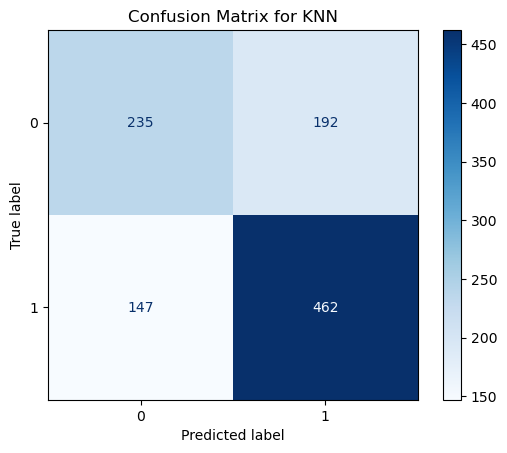

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Selecting specific stats from NFL games to use as features: each team's first downs, total yards, turnovers, penalties, and third down conversion percentage
# Using these features to predict the winner of the game
columns_to_read = ['away_first_downs', 'away_total_yards', 'away_turnovers', 'away_penalties', 'away_third_down_percent', 'home_first_downs', 'home_total_yards', 'home_turnovers', 'home_penalties', 'home_third_down_percent', 'home_team_win']

df = pd.read_csv('nfl_historical_data_upto_2012.csv', usecols=columns_to_read)

X = df[['away_first_downs', 'away_total_yards', 'away_turnovers', 'away_penalties', 'away_third_down_percent', 'home_first_downs', 'home_total_yards', 'home_turnovers', 'home_penalties', 'home_third_down_percent']]
y = df['home_team_win']

# Splitting data using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=15)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('0 = away team win, 1 = home team win\n\n')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_matrix_display.plot(cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.show()